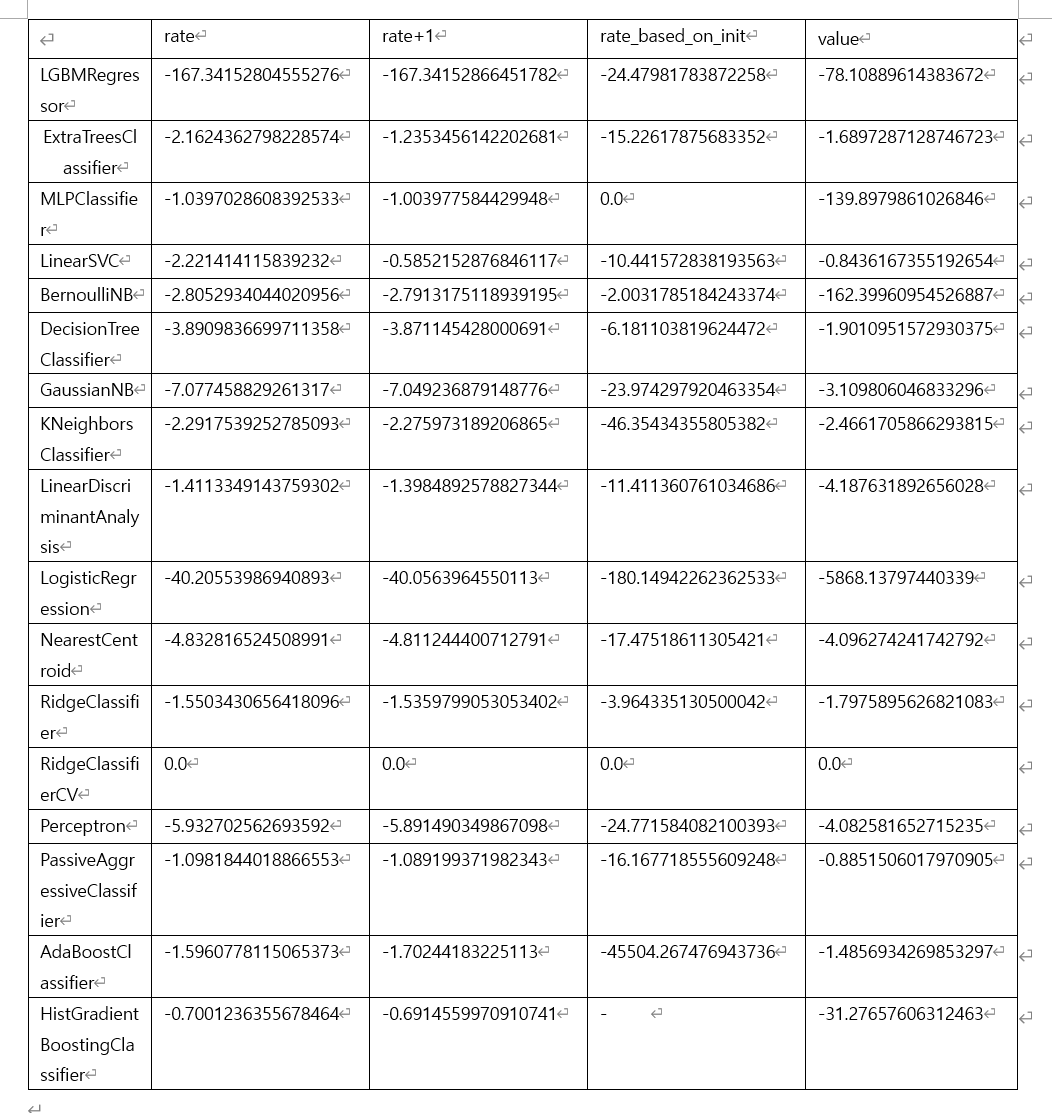

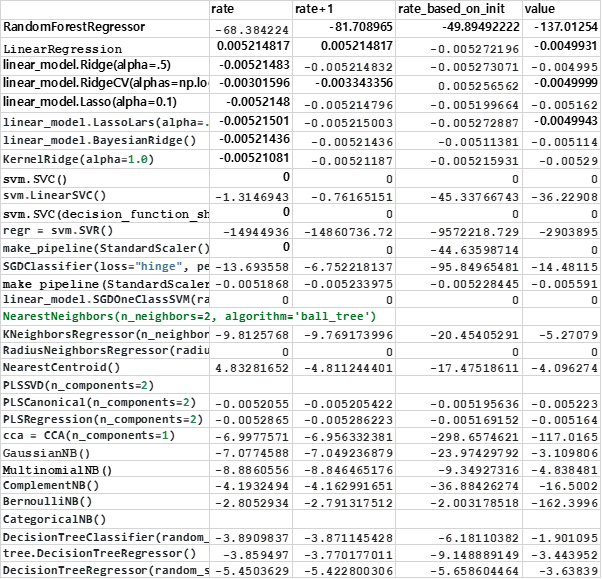

In [939]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [940]:
cd /content/drive/MyDrive/Colab Notebooks/DACON_PakChoi

/content/drive/MyDrive/Colab Notebooks/DACON_PakChoi


해야할 것
1. target 변화
2. 모델 변화

In [941]:
import pandas as pd
import os
#from sklearn.metrics import r2_score
'''
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
'''
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

train dataset 만들기

In [942]:
train_x = pd.DataFrame()
for filenum in [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26]:
  if filenum < 10:
    tmp_df= pd.read_csv(f'./train_input/CASE_0{filenum}.csv')
  else:
    tmp_df= pd.read_csv(f'./train_input/CASE_{filenum}.csv')

  tmp_df.fillna(value=0,inplace=True)
  tmp_df['시간'] = pd.to_datetime(tmp_df['시간'])
  tmp_df['date'] = tmp_df['시간'].dt.date
  tmp_df = tmp_df.groupby('date').sum()

  train_x = pd.concat([train_x, tmp_df])

In [943]:
train_y = pd.DataFrame()
for filenum in [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26]:
  if filenum < 10:
    tmp_df= pd.read_csv(f'./train_target/CASE_0{filenum}.csv')
  else:
    tmp_df= pd.read_csv(f'./train_target/CASE_{filenum}.csv')

  absolute_value=1
  list_tmp_df=[]

  tmp_df["rate+1"]= tmp_df['rate']+1

  for i in list(tmp_df["rate+1"]):
      absolute_value*=i
      list_tmp_df.append(absolute_value)
  tmp_df['rate_based_on_init']=list_tmp_df
  tmp_df['tmp']=[1]+list_tmp_df[:-1]
  tmp_df['value']=tmp_df['rate_based_on_init']-tmp_df['tmp']

  train_y = pd.concat([train_y, tmp_df])

train dataset 훈련 : 이 부분 바꿔주면 돼

In [944]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(train_y['rate'])

In [945]:
clf1 = LinearRegression() # scikit run에 있는 모델들로 바꿔보기
clf1.fit(train_x, train_y['rate']) # rate+1 부분을 rate/rate+1/rate_based_on_init/value 중의 하나로

LinearRegression()

test dataset 만들기

In [946]:
test_x = pd.DataFrame()
for filenum in [27, 28, 29, 32, 33, 35]:
  tmp_df= pd.read_csv(f'./train_input/CASE_{filenum}.csv')

  tmp_df.fillna(value=0,inplace=True)
  tmp_df['시간'] = pd.to_datetime(tmp_df['시간'])
  tmp_df['date'] = tmp_df['시간'].dt.date
  tmp_df = tmp_df.groupby('date').sum()

  test_x = pd.concat([test_x, tmp_df])

In [947]:
test_y = pd.DataFrame()
for filenum in [27, 28, 29, 32, 33, 35]:
  tmp_df= pd.read_csv(f'./train_target/CASE_{filenum}.csv')

  absolute_value=1
  list_tmp_df=[]

  tmp_df["rate+1"]= tmp_df['rate']+1

  for i in list(tmp_df["rate+1"]):
      absolute_value*=i
      list_tmp_df.append(absolute_value)
  tmp_df['rate_based_on_init']=list_tmp_df
  tmp_df['tmp']=[1]+list_tmp_df[:-1]
  tmp_df['value']=tmp_df['rate+1']-tmp_df['tmp']

  test_y = pd.concat([test_y, tmp_df])

test dataset 검증 : 이 부분 바꿔주면 돼

In [948]:
RMSE = mean_squared_error(clf1.predict(test_x), test_y['rate'])**0.5 # rate+1 부분을 rate/rate+1/rate_based_on_init/value 중의 하나로
print(RMSE)

63501.9293386319


In [949]:
print(*zip(clf1.predict(test_x), test_y['rate']),sep='\n')

(0.34296317083944966, 1.33333)
(0.31672492370843297, -0.85714)
(0.2960269280724442, 13.0)
(0.30959298807667973, 0.14286)
(0.2635506610805887, 0.125)
(0.3240266819507913, 0.0)
(0.2688896209711298, -0.88889)
(0.278244487794803, 20.5)
(0.32204238106756644, 1.67442)
(0.2681267511881389, -0.03478)
(0.26265154910175786, 0.42342)
(0.20622137558696563, 1.29747)
(0.11474606822167699, 0.27548)
(0.19046773713946924, 0.14039)
(0.11925445501794008, 0.50379)
(0.17562462659482003, 0.43073)
(0.18426244596242286, 0.33891)
(0.21238840087353278, 0.39645)
(0.10926916438404766, 0.01083)
(0.19670401738405996, 0.00466)
(0.2035993255777001, 0.02133)
(0.10670198774138873, 0.01725)
(0.16549168184862167, 0.02276)
(0.12598562149610942, 0.02225)
(0.16849623899153826, 0.01152)
(0.2838628192901505, 0.05401)
(0.2782417477595452, 0.00721)
(0.2851095872065263, 0.00596)
(0.23583672085830953, 0.01225)
(0.17473537022493119, 0.06284)
(0.18310774869051488, 0.04187)
(0.14872792528713497, 0.01163)
(0.12232614887620197, 0.0104